In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# Cargar archivo "extract - cash request - data analyst.csv"
data = pd.read_csv("C:/Users/Khaled/Desktop/IRON HACK/project-1-ironhack-payments-en-master/project_dataset/extract - cash request - data analyst.csv")

# Traer valores de la columna "deleted_account_id" a las celdas correspondientes de la columna "user_id"
data['user_id'] = data['user_id'].fillna(data['deleted_account_id'])

# Convertir 'created_at' al formato datetime para un análisis adecuado basado en el tiempo
data['created_at'] = pd.to_datetime(data['created_at'])

#Imprimir el emcabezado del dataset "data"
data.head()


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [2]:
# Para el análisis de cohortes, determinar la fecha de la primera solicitud (cohorte) por usuario.
user_cohort = data.groupby('user_id')['created_at'].min().reset_index()

# Seleccionar las columnas "uder_id" y "cohort"
user_cohort.columns = ['user_id', 'cohort']

#Imprimir el emcabezado
user_cohort.head()

,user_id,cohort
0,34.0,2020-04-20 15:50:21.187257+00:00
1,35.0,2019-12-13 20:27:38.106778+00:00
2,47.0,2019-11-19 13:57:53.511561+00:00
3,52.0,2019-12-17 09:01:12.584634+00:00
4,53.0,2019-12-21 11:39:03.844436+00:00


In [3]:
# Merge la información de la cohorte de nuevo "user_cohort" al conjunto de datos principal "extract - cash request - data
data = pd.merge(data, user_cohort, on='user_id', how='left')


#Imprimir el emcabezado
data.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:05:21.596873+00:00
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:50:12.347780+00:00
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:13:35.825460+00:00
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:16:10.880172+00:00
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05-06 09:59:38.877376+00:00


In [4]:
# Agregar nuevas columnas con un formato yyyy-mm para las columnas 'cohort' y 'created_at'
data['cohort_month'] = data['cohort'].dt.to_period('M')
data['request_month'] = data['created_at'].dt.to_period('M')

data.head()

C:\Users\Khaled\AppData\Local\Temp\ipykernel_64072\964109825.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['cohort_month'] = data['cohort'].dt.to_period('M')
C:\Users\Khaled\AppData\Local\Temp\ipykernel_64072\964109825.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['request_month'] = data['created_at'].dt.to_period('M')


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:05:21.596873+00:00,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:50:12.347780+00:00,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:13:35.825460+00:00,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:16:10.880172+00:00,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05-06 09:59:38.877376+00:00,2020-05,2020-05


In [5]:
# Contar el número de solicitudes por usuario por mes desde su cohorte.
user_request_frequency = data.groupby(['user_id', 'cohort_month', 'request_month']).size().reset_index(name='request_count')


#Imprimir el emcabezado
user_request_frequency.head()

,user_id,cohort_month,request_month,request_count
0,34.0,2020-04,2020-04,1
1,35.0,2019-12,2019-12,2
2,35.0,2019-12,2020-01,1
3,35.0,2019-12,2020-02,1
4,35.0,2019-12,2020-03,1


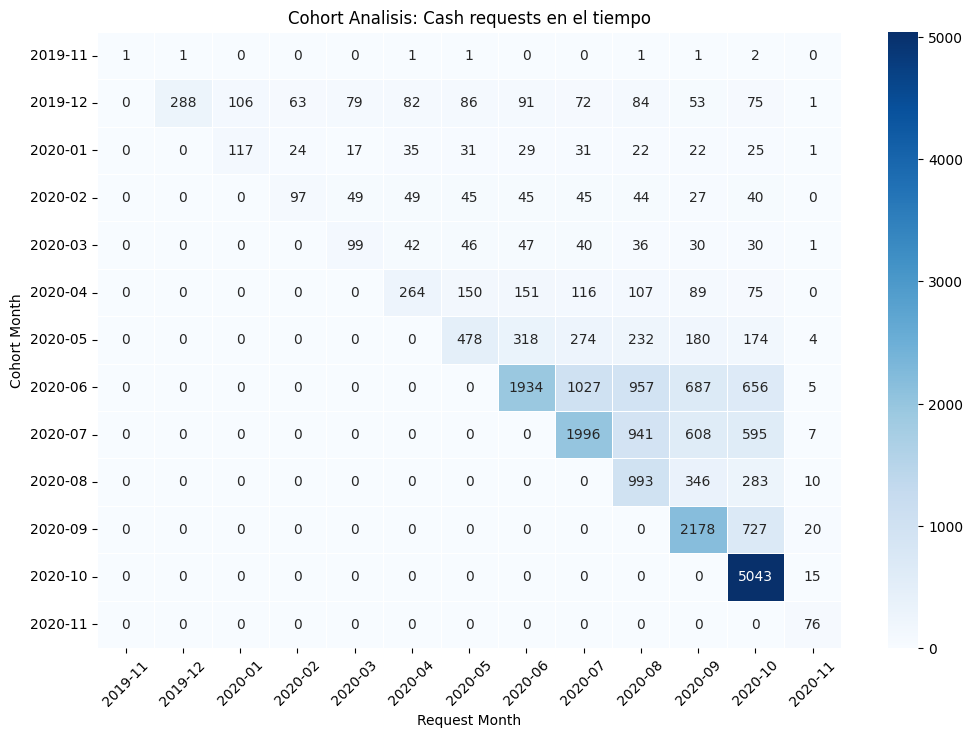

In [6]:
#Pivotar los datos para crear una estructura de mapa de calor de cohortes por mes de solicitud
cohort_pivot = user_request_frequency.pivot_table(
    index='cohort_month', columns='request_month', values='request_count', aggfunc='sum', fill_value=0
)

# Plot el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, cmap="Blues", annot=True, fmt="d", linewidths=.5)
plt.title("Cohort Analisis: Cash requests en el tiempo")
plt.xlabel("Request Month")
plt.ylabel("Cohort Month")
plt.xticks(rotation=45)
plt.show()

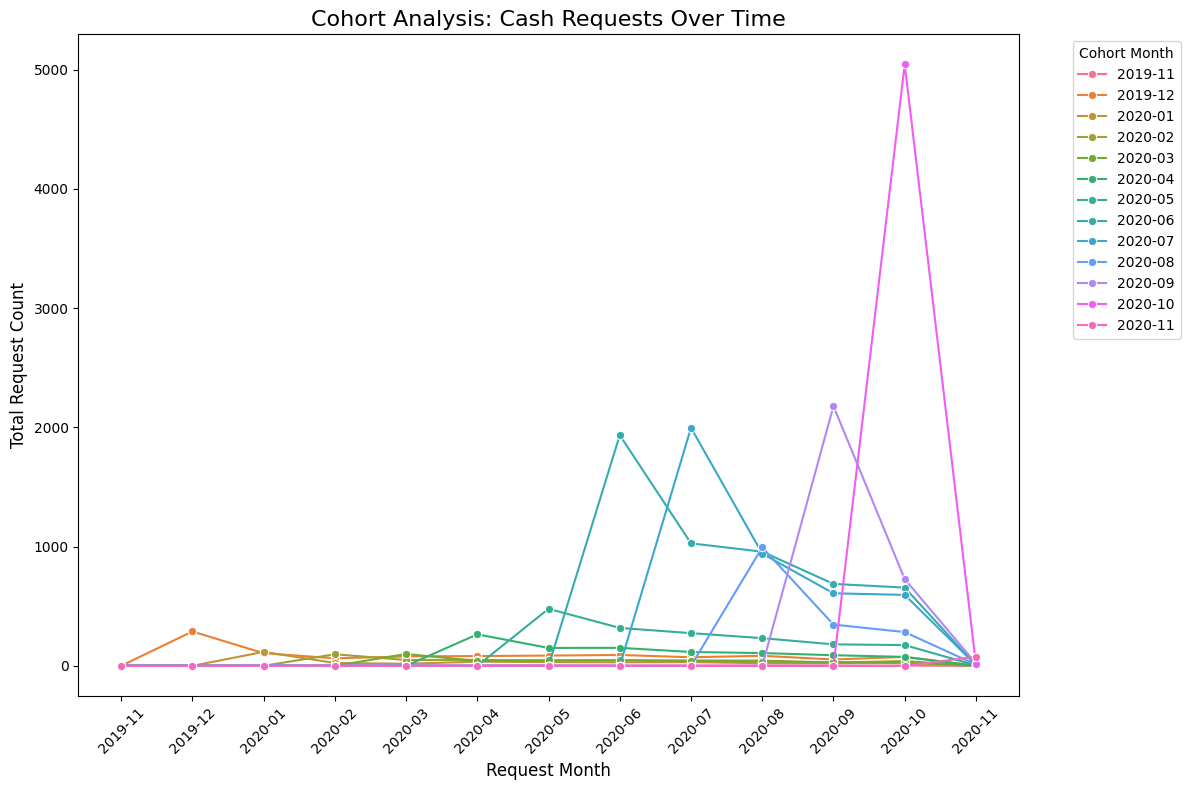

In [7]:
# Pivotar los datos para crear una tabla de cohortes por mes de solicitud
cohort_pivot = user_request_frequency.pivot_table(
    index='cohort_month', columns='request_month', values='request_count', aggfunc='sum', fill_value=0
)

# Reiniciar el índice para que cohort_month se convierta en una columna para graficar
cohort_pivot_reset = cohort_pivot.reset_index()

# Derretir los datos pivotados para facilitar la graficación
cohort_melted = cohort_pivot_reset.melt(id_vars='cohort_month', var_name='request_month', value_name='request_count')

# Convertir request_month a cadena y request_count a numérico (si es necesario)
cohort_melted['request_month'] = cohort_melted['request_month'].astype(str)
cohort_melted['request_count'] = pd.to_numeric(cohort_melted['request_count'], errors='coerce')

# Graficar el gráfico de líneas usando seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=cohort_melted, x='request_month', y='request_count', hue='cohort_month', marker='o')

# Agregar títulos y etiquetas
plt.title('Cohort Analysis: Cash Requests Over Time', fontsize=16)
plt.xlabel('Request Month', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Cohort Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


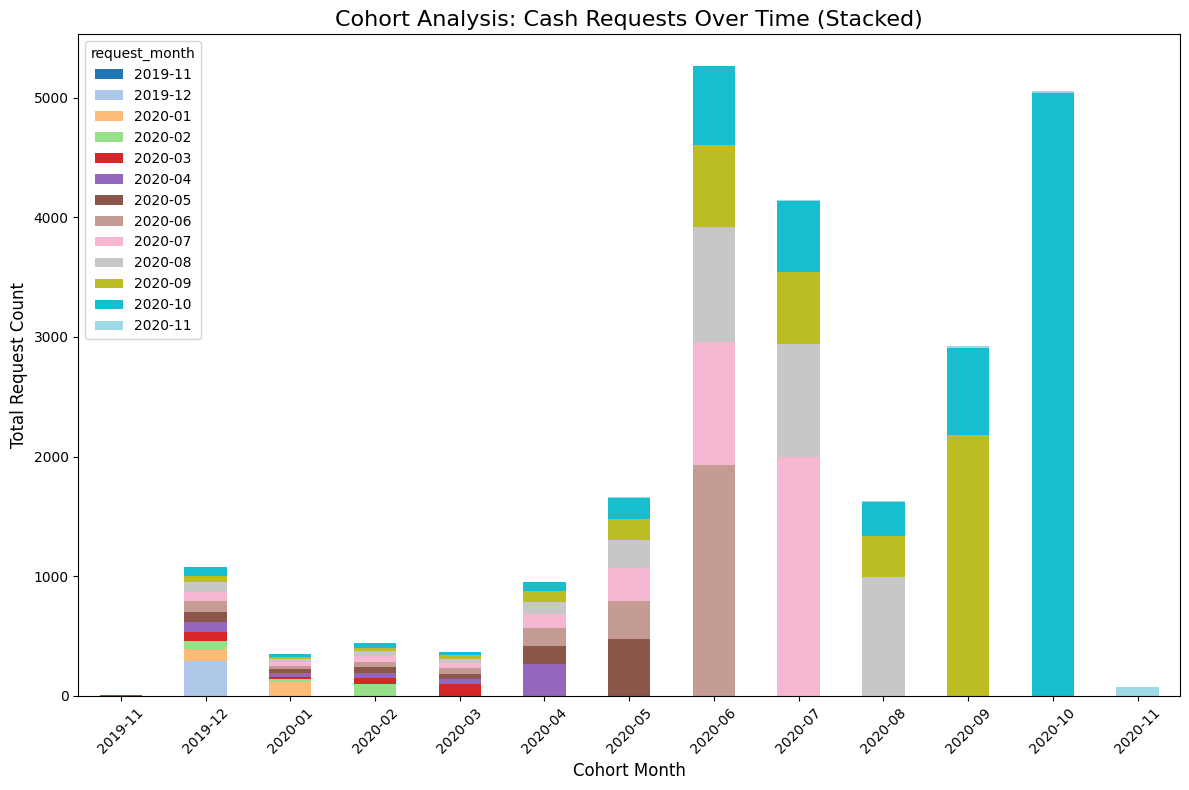

In [8]:
# Pivot the data to create a cohort by request_month table
cohort_pivot = user_request_frequency.pivot_table(
    index='cohort_month', columns='request_month', values='request_count', aggfunc='sum', fill_value=0
)
# Plot the stacked bar plot
cohort_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')
# Add titles and labels
plt.title('Cohort Analysis: Cash Requests Over Time (Stacked)', fontsize=16)
plt.xlabel('Cohort Month', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Loading the second file
data_fees = pd.read_csv("C:/Users/Khaled/Desktop/IRON HACK/project-1-ironhack-payments-en-master/project_dataset/extract - fees - data analyst - .csv")

# Renaming 'id' to 'cash_request_id' in the main dataset to match the key for merging
# data = pd.read_csv("extract - cash request - data analyst.csv")
data = data.rename(columns={'id': 'cash_request_id'})

data.head()


,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:05:21.596873+00:00,2019-12,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:50:12.347780+00:00,2019-12,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:13:35.825460+00:00,2019-12,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12-10 19:16:10.880172+00:00,2019-12,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05-06 09:59:38.877376+00:00,2020-05,2020-05


In [10]:
# Merging the datasets on 'cash_request_id' using a left join
data_merged = pd.merge(data_fees, data, on='cash_request_id', how='left')

# Displaying the first few rows of the merged dataset 
data_merged.head()

,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00,2020-09-07 10:46:57.780263+00:00,2020-09,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00,2020-06-21 18:38:39.791418+00:00,2020-06,2020-08
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,2020-10-27,2020-11-04 19:34:37.399122+00,instant,2020-10-23 10:10:52.894637+00,NaN,NaN,NaN,2020-10-23 10:10:43.278601+00:00,2020-10,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,2020-11-03,2020-11-17 23:00:00+00,instant,2020-10-31 15:46:46.846335+00,NaN,NaN,NaN,2020-10-31 15:46:14.156730+00:00,2020-10,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020-06-27 18:06:04.818312+00:00,2020-06,2020-10


In [11]:
#Filter data in column "Type" to show "Incident" only and count how many they are
number_incidents = data_merged["type"].value_counts()["incident"]
number_incidents

np.int64(2196)

In [12]:
# count how many lines is there total.
number_transactions = data_merged["type"].count()
number_transactions

np.int64(21061)

In [13]:
# calculate the percentage between incident number and total transactions
tasa_incident_global = (number_incidents/number_transactions)*100

tasa_incident_global

np.float64(10.42685532500831)

In [14]:
# Convert 'created_at' to datetime format for proper time-based analysis
data_merged['created_at_x'] = pd.to_datetime(data_merged['created_at_x'])

data_merged.head()

,id,cash_request_id,type,status_x,category,total_amount,reason,created_at_x,updated_at_x,paid_at,...,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort,cohort_month,request_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,...,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00,2020-09-07 10:46:57.780263+00:00,2020-09,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,...,2020-08-12,2020-12-02 03:02:41.180953+00,instant,2020-08-17 13:15:54.290998+00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00,2020-06-21 18:38:39.791418+00:00,2020-06,2020-08
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,...,2020-10-27,2020-11-04 19:34:37.399122+00,instant,2020-10-23 10:10:52.894637+00,NaN,NaN,NaN,2020-10-23 10:10:43.278601+00:00,2020-10,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,...,2020-11-03,2020-11-17 23:00:00+00,instant,2020-10-31 15:46:46.846335+00,NaN,NaN,NaN,2020-10-31 15:46:14.156730+00:00,2020-10,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,...,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020-06-27 18:06:04.818312+00:00,2020-06,2020-10


In [15]:
# For cohort analysis, determine the first request date (cohort) per user
incident_cohort = data_merged.groupby('user_id')['created_at_x'].min().reset_index()
incident_cohort.columns = ['user_id', 'cohort_incident']
incident_cohort.head()

,user_id,cohort_incident
0,47.0,2020-05-29 14:27:56.118917+00:00
1,52.0,2020-08-11 12:12:35.630442+00:00
2,53.0,2020-10-22 17:55:25.382957+00:00
3,72.0,2020-07-15 18:28:54.166964+00:00
4,73.0,2020-09-12 15:23:43.375033+00:00


In [16]:
# Create a new column 'cohort_month' representing the month of the cohort incident
incident_cohort['cohort_month'] = incident_cohort['cohort_incident'].dt.to_period('M')

# Display the first few rows of the merged DataFrame
data_merged.head()

# Filter for incidents, group by cohort month, and count incidents
incidents_cohort = data_merged[data_merged['type'] == 'incident'].groupby('cohort_month')['type'].count().reset_index()

# Display the first few rows of the incidents cohort DataFrame
incidents_cohort.head()


C:\Users\Khaled\AppData\Local\Temp\ipykernel_64072\3593917870.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incident_cohort['cohort_month'] = incident_cohort['cohort_incident'].dt.to_period('M')


,cohort_month,type
0,2019-12,53
1,2020-01,15
2,2020-02,24
3,2020-03,32
4,2020-04,119


C:\Users\Khaled\AppData\Local\Temp\ipykernel_64072\1246816920.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')


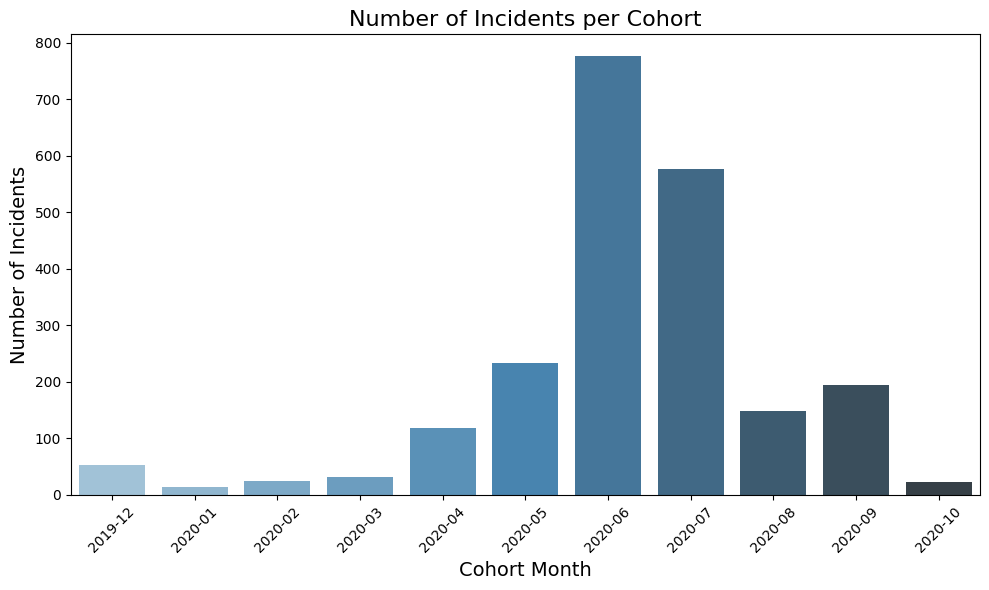

In [17]:
# Bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')

# Adding titles and labels
plt.title('Number of Incidents per Cohort', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

C:\Users\Khaled\AppData\Local\Temp\ipykernel_64072\2479998769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')


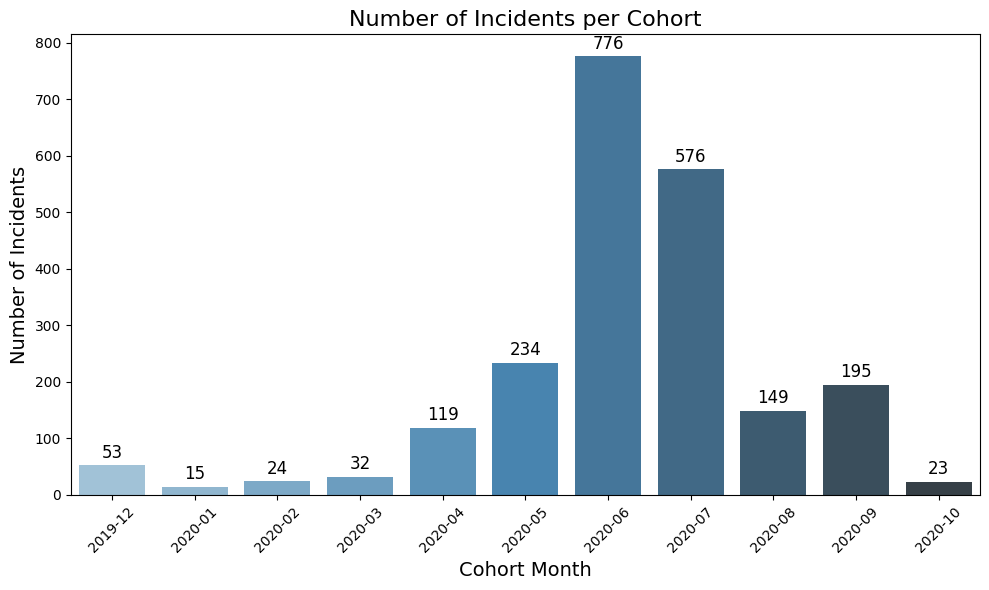

In [18]:
# Bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cohort_month', y='type', data=incidents_cohort, palette='Blues_d')

# Adding titles and labels
plt.title('Number of Incidents per Cohort', fontsize=16)
plt.xlabel('Cohort Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adding the count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()


In [19]:
# Tercer ejercicio

ingresos_generados = data_merged[data_merged['status_x'] != 'rejected'].groupby('cohort_month')['total_amount'].sum().reset_index()

ingresos_generados.head()


,cohort_month,total_amount
0,2019-11,50.0
1,2019-12,1495.0
2,2020-01,630.0
3,2020-02,930.0
4,2020-03,845.0


C:\Users\Khaled\AppData\Local\Temp\ipykernel_64072\1632954696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cohort_month', y='total_amount', data=ingresos_generados, palette='Blues_d')


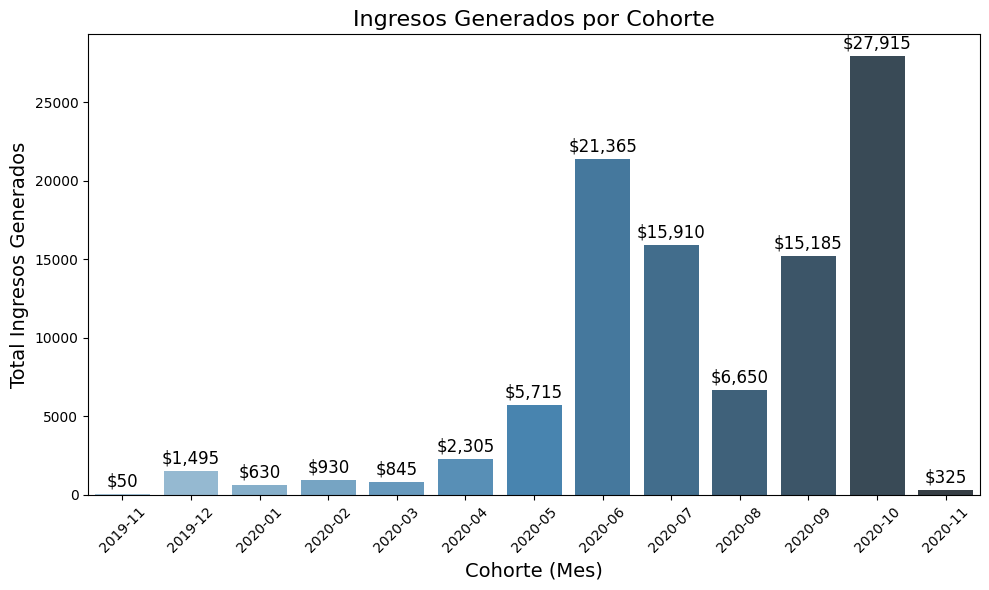

In [20]:
# Bar plot usando seaborn para los ingresos generados por cohorte
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cohort_month', y='total_amount', data=ingresos_generados, palette='Blues_d')

# Añadir títulos y etiquetas
plt.title('Ingresos Generados por Cohorte', fontsize=16)
plt.xlabel('Cohorte (Mes)', fontsize=14)
plt.ylabel('Total Ingresos Generados', fontsize=14)

# Rotar las etiquetas de la cohorte en el eje X para mejor legibilidad
plt.xticks(rotation=45)

# Añadir los valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',  # Formato para moneda
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
# Avg de ingresos per user_id per cohort_month

avg_user_cohort = data_merged[data_merged['status_x'] != 'rejected'].groupby(["id","cohort_month"])['total_amount'].mean().reset_index()

avg_user_cohort.head()

,id,cohort_month,total_amount
0,1,2020-04,5.0
1,2,2020-05,5.0
2,3,2020-01,5.0
3,4,2020-04,5.0
4,5,2020-06,5.0


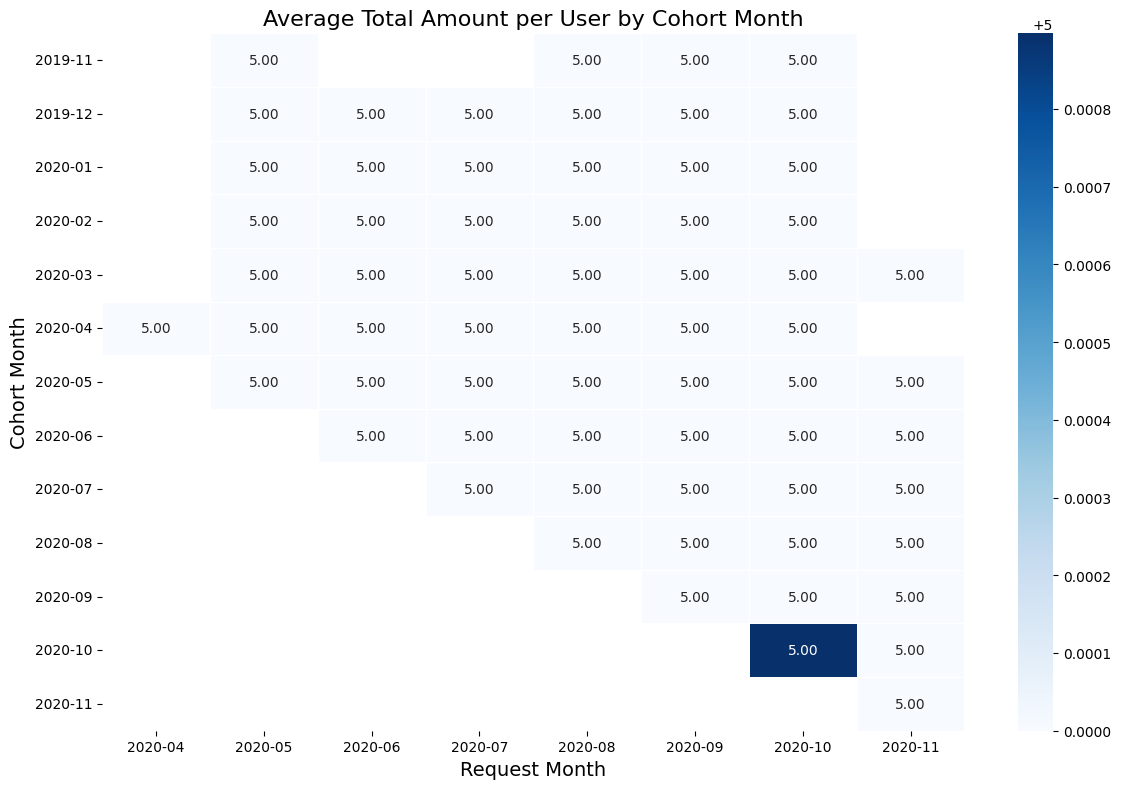

In [23]:

# Assuming `data_merged` is the DataFrame that has been created from merging the cash requests and fees
# Step 1: Filter out rejected statuses
filtered_data = data_merged[data_merged['status_x'] != 'rejected']

# Step 2: Calculate the average total amount per cohort month and request month
avg_user_cohort = filtered_data.groupby(["cohort_month", "request_month"])['total_amount'].mean().reset_index()

# Step 3: Pivot the data to create a matrix for the heatmap
heatmap_data = avg_user_cohort.pivot(index='cohort_month', columns='request_month', values='total_amount')

# Step 4: Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)

# Step 5: Add labels and title
plt.title('Average Total Amount per User by Cohort Month', fontsize=16)
plt.xlabel('Request Month', fontsize=14)
plt.ylabel('Cohort Month', fontsize=14)

# Ensure the layout fits the plot nicely
plt.tight_layout()
plt.show()
